# Ahmed Nabil Ibrahim Awaad 


# KNN

The dataset consists of several medical predictor variables and one target variable. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* 1- Load the data.
* 2- Data inspection. Clean and scale the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data
* 3- Classify the data using the sklearn.neighbors.KNeighborsClassifier Explore using different values for K, different weight functions, and different train/test ratios.
* 4-  Build your own KNN classifier. Your classifier should have three parameters
  * •	The value of k
  * •	The weight distribution function (uniform/weighted)
  * •	The distance metric function used Compare your results with results obtained from step 3.


In [183]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# preprosessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

# metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#settings
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

## 1- Load the data.

In [184]:
# import data
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2- Data inspection. Clean and scale the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data

In [185]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [186]:
# check na
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [187]:
# check duplicates
diabetes_df.duplicated().sum()

0

In [188]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


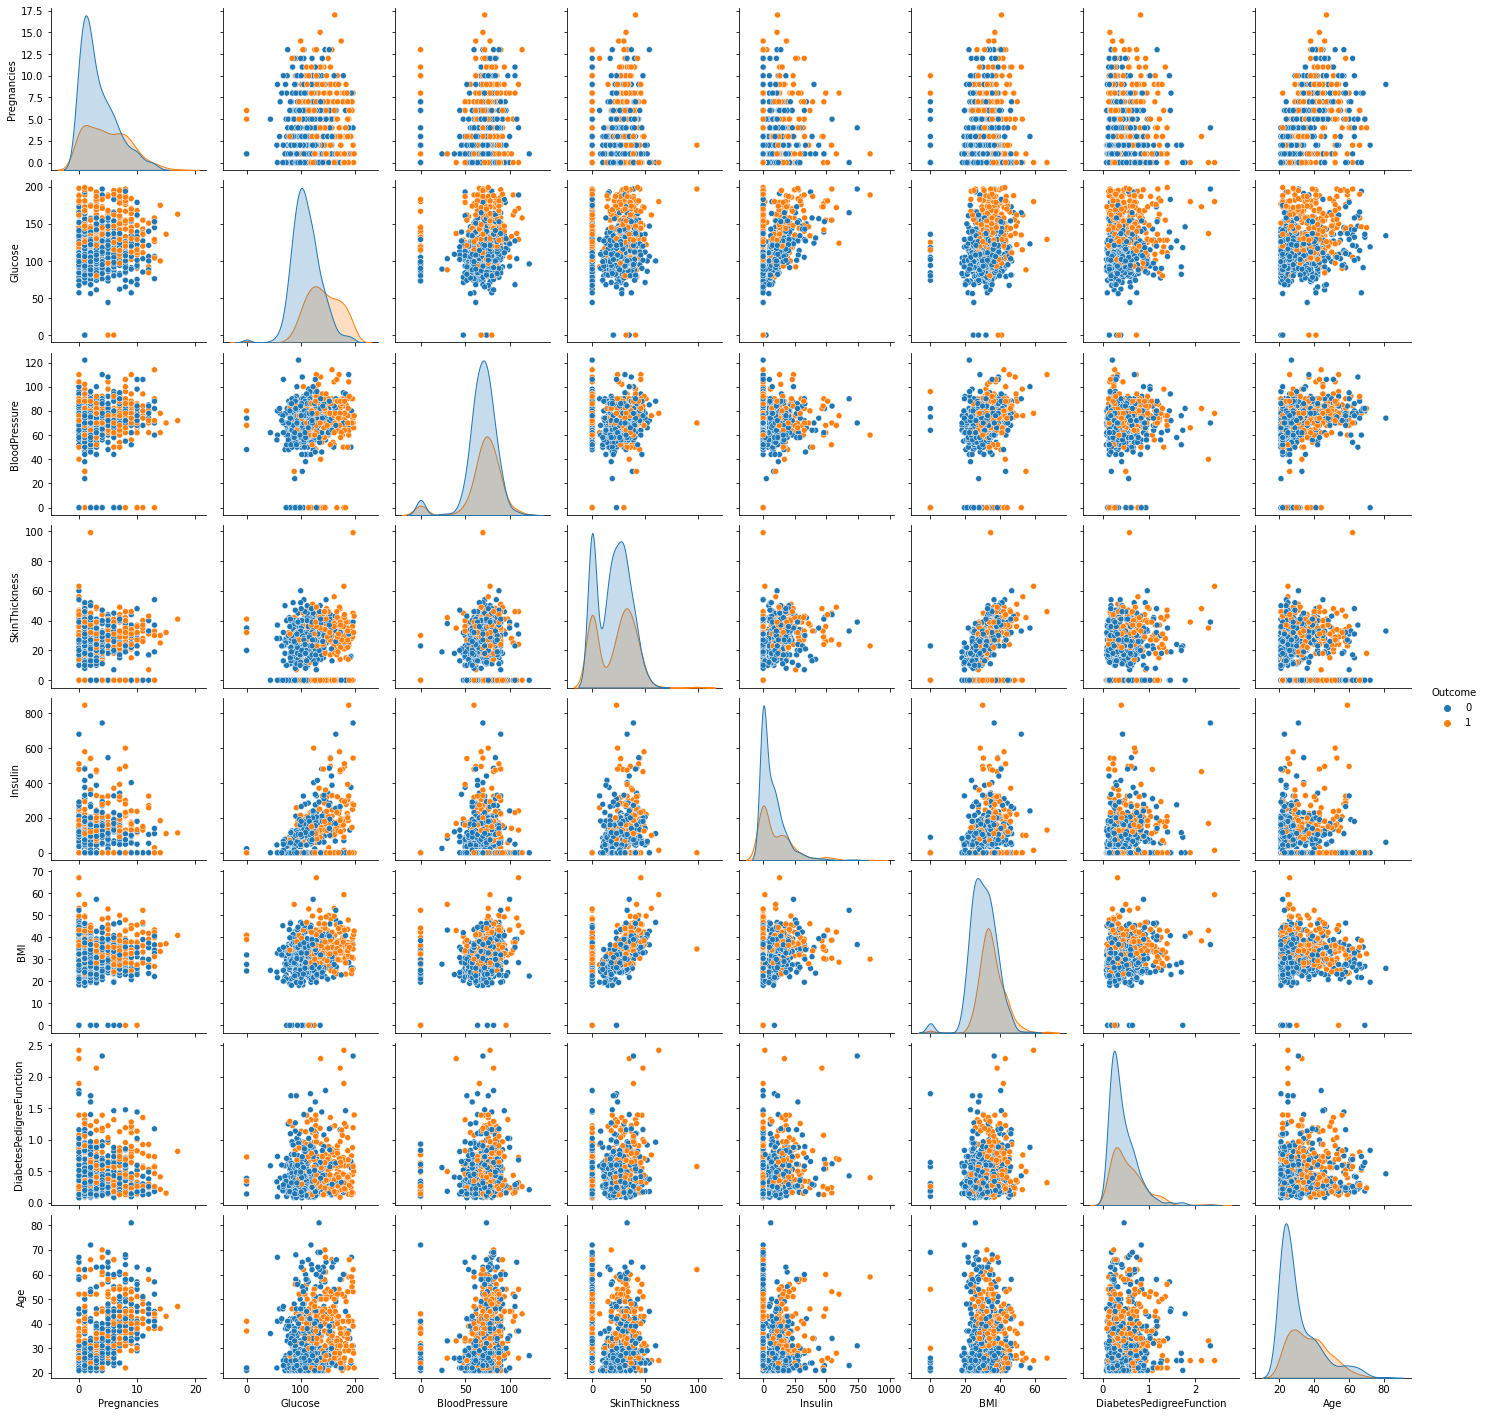

In [189]:
sns.pairplot(diabetes_df, hue='Outcome');

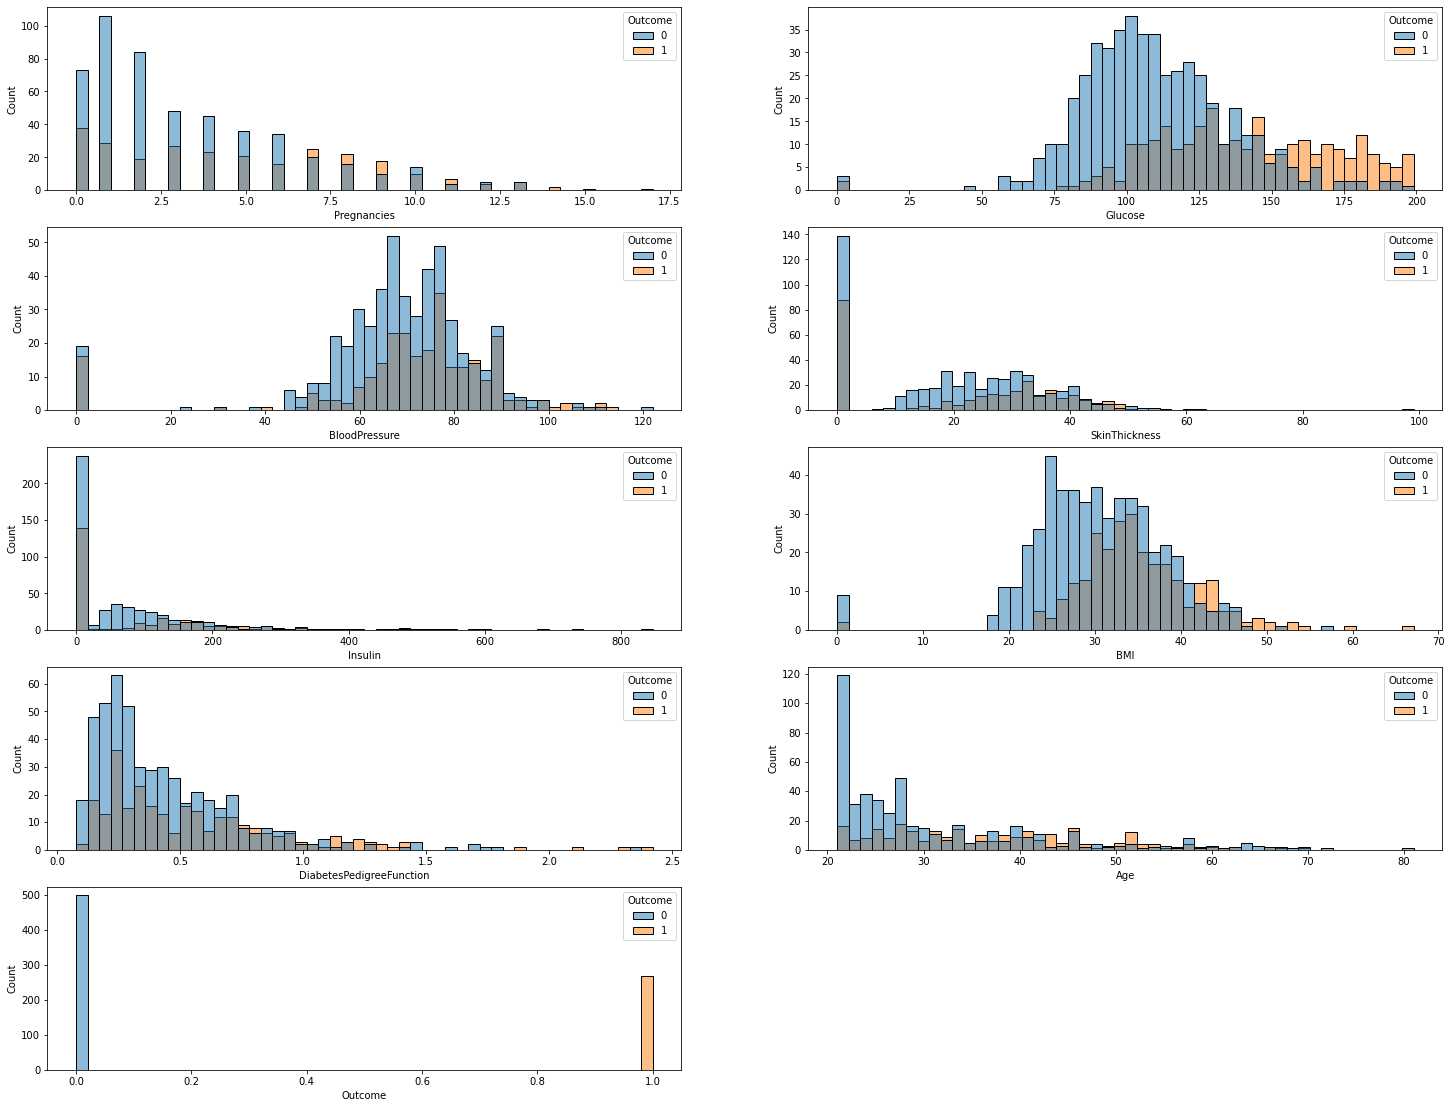

In [190]:
columns_lst = diabetes_df.columns

fig =plt.figure(figsize =(25,60))
for i, col in enumerate(columns_lst):
    plt.subplot(15, 2, i+1)
    sns.histplot(data= diabetes_df, x =col, bins=50, hue='Outcome')
plt.show()


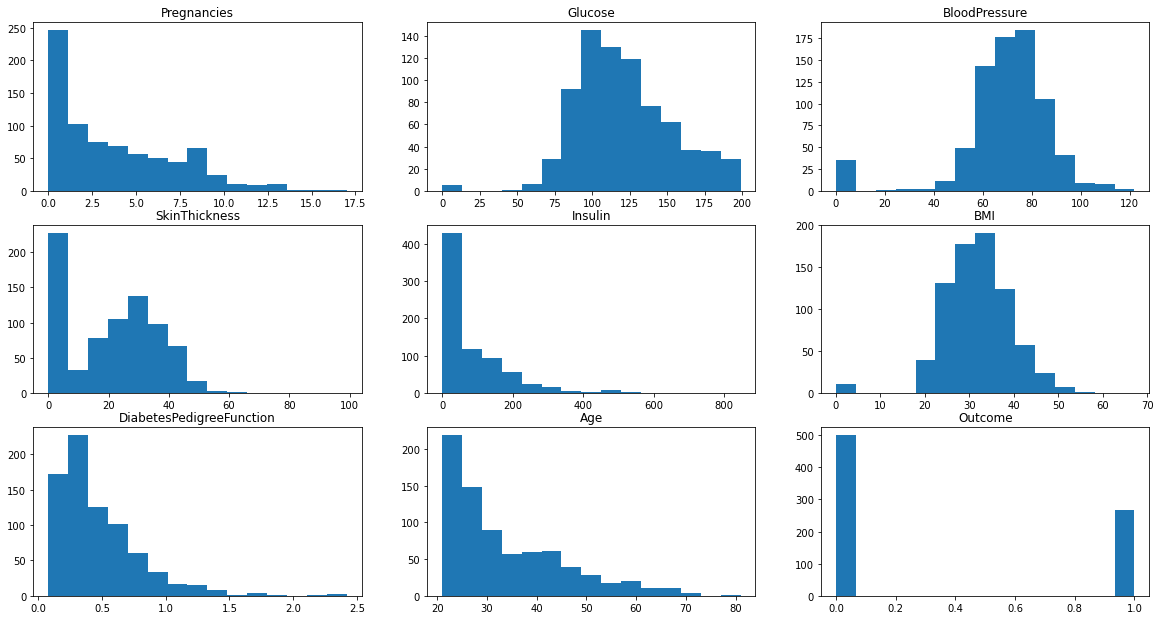

In [191]:
fig = plt.figure(figsize=(20,18))
for i,j in zip(diabetes_df.columns, range(1,1+len(diabetes_df.columns))):
        ax = fig.add_subplot(5,3,j)
        ax.hist(diabetes_df[i], bins=15)
        ax.set_title(i)

### let's check 
- 1- Zero Glucose
- 2- Zero insulin
- 3- Zero BMI
- 4- Zero blood pressure
- 5- Zero skin thickness

In [192]:
# It is a few records, we can drop it.
(diabetes_df.Glucose == 0).sum()

5

In [193]:
diabetes_df[diabetes_df.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [194]:
diabetes_df = diabetes_df[diabetes_df.Glucose != 0]

In [195]:
# It is a few records, we can drop it.
(diabetes_df.BMI == 0).sum()

11

In [196]:
diabetes_df[diabetes_df.BMI == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [197]:
diabetes_df = diabetes_df[diabetes_df.BMI != 0]

In [198]:
(diabetes_df.BloodPressure == 0).sum()

28

In [199]:
diabetes_df[diabetes_df.BloodPressure == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
78,0,131,0,0,0,43.2,0.270,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1
269,2,146,0,0,0,27.5,0.240,28,1
300,0,167,0,0,0,32.3,0.839,30,1


In [200]:
diabetes_df = diabetes_df[diabetes_df.BloodPressure != 0]

In [201]:
(diabetes_df.Insulin == 0).sum()

332

In [202]:
# We can create linear model to get Insulin from Glucose
data = diabetes_df[diabetes_df.Insulin != 0]
# split data set
features = ['Glucose', 'BMI',]
X =data[features]
y =data['Insulin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

In [203]:
models = {
            "LR"    : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "KNNR"  : KNeighborsRegressor(),
            "SVR"   : SVR(),
            "DT"    : DecisionTreeRegressor(),
            "RF"    : RandomForestRegressor(),
            "XGBR"  : XGBRegressor(),
            "catboost" : CatBoostRegressor()
            }

results = []
for name, model in models.items():
    print('{0:25} : {1:5}'.format('Model name', name ) )

    model.fit(X_train, y_train)
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)

    print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )

    print('-'*50 + '\n')

    temp ={'Name':name,'Training_Score':Training_Score, 'Test_Score':Test_Score}
    results.append(temp)

Model name                : LR   
R^2 Training Score        : 0.3266809444766059
R^2 Test Score            : 0.42400044542689674
--------------------------------------------------

Model name                : Lasso
R^2 Training Score        : 0.3266794875083806
R^2 Test Score            : 0.42382804042378774
--------------------------------------------------

Model name                : Ridge
R^2 Training Score        : 0.3266809444352665
R^2 Test Score            : 0.4239994863313371
--------------------------------------------------

Model name                : KNNR 
R^2 Training Score        : 0.4872555807205521
R^2 Test Score            : 0.1413890825025823
--------------------------------------------------

Model name                : SVR  
R^2 Training Score        : 0.10029918171623164
R^2 Test Score            : 0.15418944948114377
--------------------------------------------------

Model name                : DT   
R^2 Training Score        : 0.9938996111199689
R^2 Test Score 

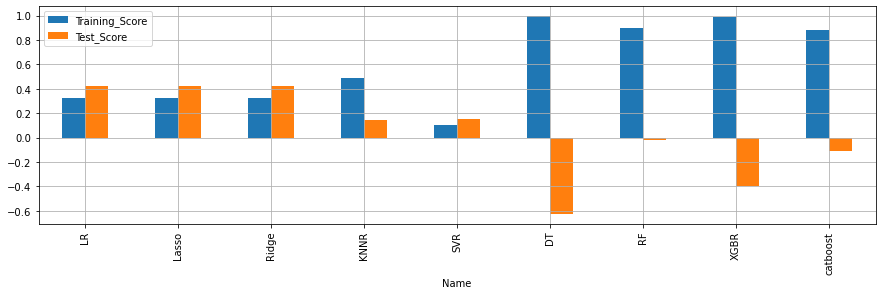

In [204]:
results_df = pd.DataFrame(results)
results_df.plot(x="Name", y=['Training_Score',	'Test_Score'], kind="bar",figsize=(15,4))
plt.grid()
# legend
plt.legend();

In [205]:
# final model 
linear_model = LinearRegression().fit(data[features], data['Insulin'])

diabetes_df['Insulin_Pred'] = linear_model.predict(diabetes_df[features])

diabetes_df['Insulin_LM'] = np.where(diabetes_df['Insulin']>0, diabetes_df['Insulin'], np.round(diabetes_df['Insulin_Pred']))

In [206]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Pred,Insulin_LM
0,6,148,72,35,0,33.6,0.627,50,1,211.556165,212.0
1,1,85,66,29,0,26.6,0.351,31,0,63.156707,63.0
2,8,183,64,0,0,23.3,0.672,32,1,267.744774,268.0
3,1,89,66,23,94,28.1,0.167,21,0,74.532126,94.0
4,0,137,40,35,168,43.1,2.288,33,1,205.485861,168.0


In [207]:
# Skin thickness is primarily determined by collagen content and is increased in insulin-dependent diabetes mellitus (IDDM).
(diabetes_df.SkinThickness == 0).sum()

192

In [208]:
# We can create linear model to get skinthickness from BMI
data2 = diabetes_df[diabetes_df.SkinThickness != 0]
# split data set
features = ['BMI',]
X =data2[features]
y =data2['SkinThickness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
models = {
            "LR"    : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "KNNR"  : KNeighborsRegressor(),
            "SVR"   : SVR(),
            "DT"    : DecisionTreeRegressor(),
            "RF"    : RandomForestRegressor(),
            "XGBR"  : XGBRegressor(),
            "catboost" : CatBoostRegressor()
            }
results = []

for name, model in models.items():
    print('{0:25} : {1:5}'.format('Model name', name ) )
    
    
    model.fit(X_train, y_train)
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)
    

    print('{0:25} : {1:5}'.format('R^2 Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('R^2 Test Score',  Test_Score) )
    
    print('-'*50 + '\n')
    
    temp ={'Name':name,'Training_Score':Training_Score, 'Test_Score':Test_Score}
    results.append(temp)

Model name                : LR   
R^2 Training Score        : 0.4037776491658751
R^2 Test Score            : 0.48377041237010854
--------------------------------------------------

Model name                : Lasso
R^2 Training Score        : 0.40359353642644213
R^2 Test Score            : 0.48157422209553113
--------------------------------------------------

Model name                : Ridge
R^2 Training Score        : 0.4037776482093268
R^2 Test Score            : 0.48376581176869826
--------------------------------------------------

Model name                : KNNR 
R^2 Training Score        : 0.5272521990279714
R^2 Test Score            : 0.41884753726808466
--------------------------------------------------

Model name                : SVR  
R^2 Training Score        : 0.40631276179874776
R^2 Test Score            : 0.43681060250901826
--------------------------------------------------

Model name                : DT   
R^2 Training Score        : 0.6490296954993069
R^2 Test Sco

,Name,Training_Score,Test_Score
0,LR,0.403778,0.483770
1,Lasso,0.403594,0.481574
2,Ridge,0.403778,0.483766
3,KNNR,0.527252,0.418848
4,SVR,0.406313,0.436811
5,DT,0.649030,0.228298
6,RF,0.627127,0.344370
7,XGBR,0.646284,0.296960
8,catboost,0.574240,0.423072


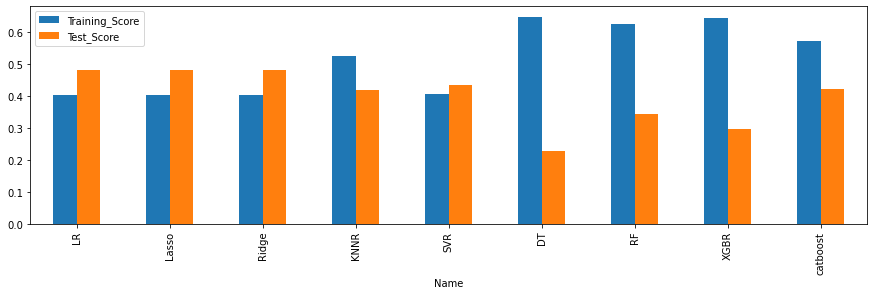

In [210]:
results_df = pd.DataFrame(results)
display(results_df)

results_df.plot(x="Name", y=['Training_Score',	'Test_Score'], kind="bar",figsize=(15,4))
plt.legend();

In [211]:
# final model 
linear_model = KNeighborsRegressor().fit(data2[['BMI']], data2['SkinThickness'])

diabetes_df['SkinThickness_Pred'] = linear_model.predict(diabetes_df[['BMI']])

diabetes_df['SkinThickness_LM'] = np.where(diabetes_df['SkinThickness']>0, diabetes_df['SkinThickness'], np.round(diabetes_df['SkinThickness_Pred']))

In [212]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Pred,Insulin_LM,SkinThickness_Pred,SkinThickness_LM
0,6,148,72,35,0,33.6,0.627,50,1,211.556165,212.0,36.4,35.0
1,1,85,66,29,0,26.6,0.351,31,0,63.156707,63.0,20.0,29.0
2,8,183,64,0,0,23.3,0.672,32,1,267.744774,268.0,16.6,17.0
3,1,89,66,23,94,28.1,0.167,21,0,74.532126,94.0,25.6,23.0
4,0,137,40,35,168,43.1,2.288,33,1,205.485861,168.0,38.0,35.0


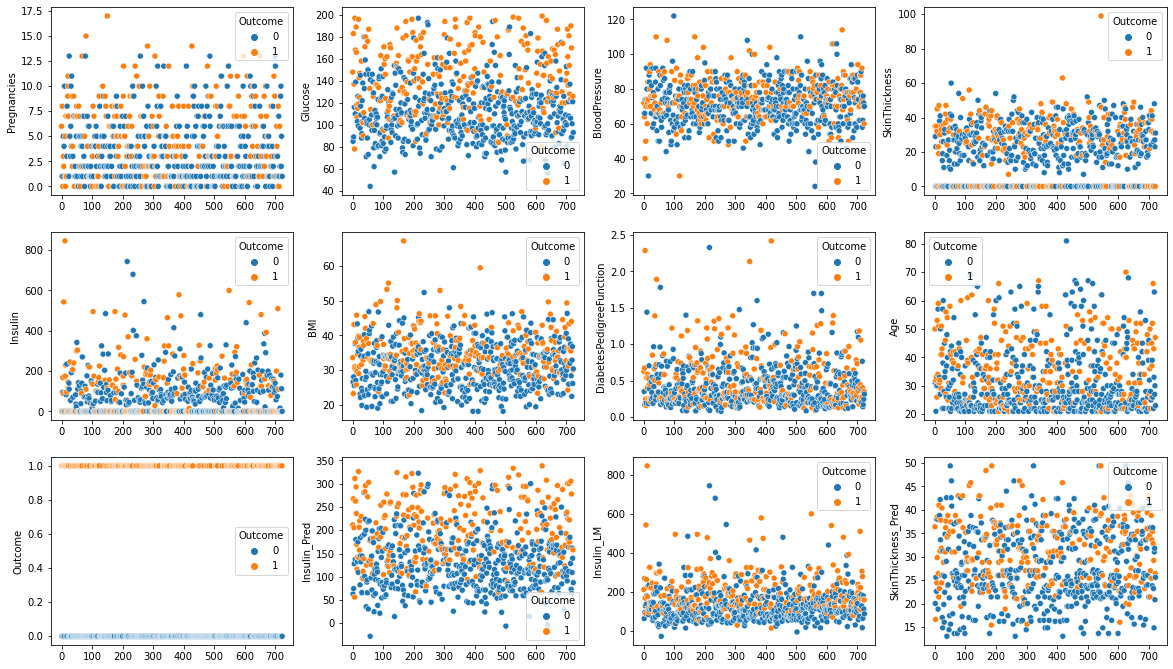

In [213]:
fig = plt.subplots(figsize=(20,20))
for i, j in zip(diabetes_df.columns, range(1, len(diabetes_df.columns))):
    plt.subplot(5,4,j)
    sns.scatterplot(x=np.arange(diabetes_df.shape[0]), y= np.power(diabetes_df[i],1), hue=diabetes_df['Outcome'])

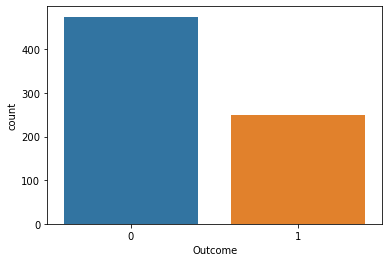

In [214]:
sns.countplot(diabetes_df.Outcome);

In [215]:
# Normalize Data
scaler = MinMaxScaler()
columns_to_scale = diabetes_df.columns

diabetes_df[columns_to_scale] = scaler.fit_transform(diabetes_df[columns_to_scale])

In [216]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Pred,Insulin_LM,SkinThickness_Pred,SkinThickness_LM
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1.0,0.653743,0.274600,0.642857,0.304348
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0.0,0.248683,0.104119,0.192308,0.239130
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1.0,0.807111,0.338673,0.098901,0.108696
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0.0,0.279732,0.139588,0.346154,0.173913
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1.0,0.637174,0.224256,0.686813,0.304348


## 3- Classify the data using the KNN

In [217]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Insulin_Pred',
       'Insulin_LM', 'SkinThickness_Pred', 'SkinThickness_LM'],
      dtype='object')

In [218]:
# split data set
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_Pred',
            'Insulin_LM', 'SkinThickness_Pred', 'SkinThickness_LM']

X_train, X_test= train_test_split(diabetes_df, test_size=0.33, random_state=42, stratify=diabetes_df['Outcome'])

y_train = X_train.Outcome
y_test = X_test.Outcome
X_train = X_train[features]
X_test = X_test[features]


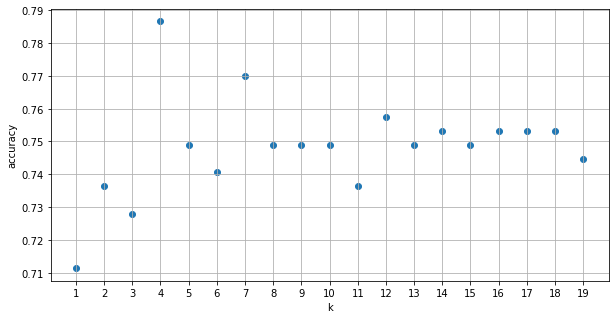

In [219]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k_range)
plt.grid()
plt.show()

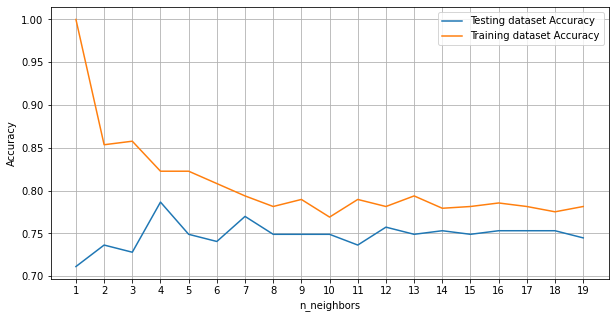

In [220]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10,5))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

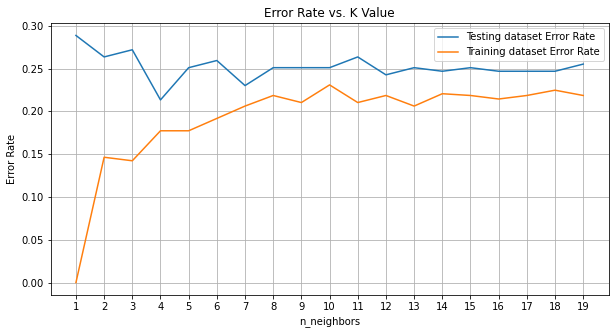

In [221]:
#Choosing a K Value
neighbors = np.arange(1, 20)
error_rate_test = []
error_rate_train = []

# Will take some time
for k in neighbors:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    error_rate_test.append(np.mean(pred_test != y_test))
    pred_train = knn.predict(X_train)
    error_rate_train.append(np.mean(pred_train != y_train))

# Generate plot
plt.figure(figsize=(10,5))
plt.plot(neighbors, error_rate_test, label = 'Testing dataset Error Rate')
plt.plot(neighbors, error_rate_train, label = 'Training dataset Error Rate')

plt.legend()
plt.title('Error Rate vs. K Value')
plt.ylabel('Error Rate')
plt.xlabel('n_neighbors')
plt.xticks(k_range)
plt.grid()
plt.show()


In [222]:
# we will use k = 4 

In [223]:
def Plot_decision_surface(X, y, model, title, xlabel, ylabel, mar=0.2,
                            create_figure=True, figsize=(15,15), step=0.02, alpha=0.8, set_ticks = False, cmap=plt.cm.seismic):
    # step size in the mesh
    h = step
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - mar, X[:, 0].max() + mar
    y_min, y_max = X[:, 1].min() - mar, X[:, 1].max() + mar
    x_min, x_max = X[:, 0].min() - mar, X[:, 0].max() + mar
    y_min, y_max = X[:, 1].min() - mar, X[:, 1].max() + mar
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    if create_figure:
        plt.figure(figsize=figsize)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=alpha)

    # Plot also the training points
    sns.scatterplot(X[:, 0], X[:, 1], hue =y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not set_ticks:
        plt.xticks(())
        plt.yticks(())
    plt.title(title)

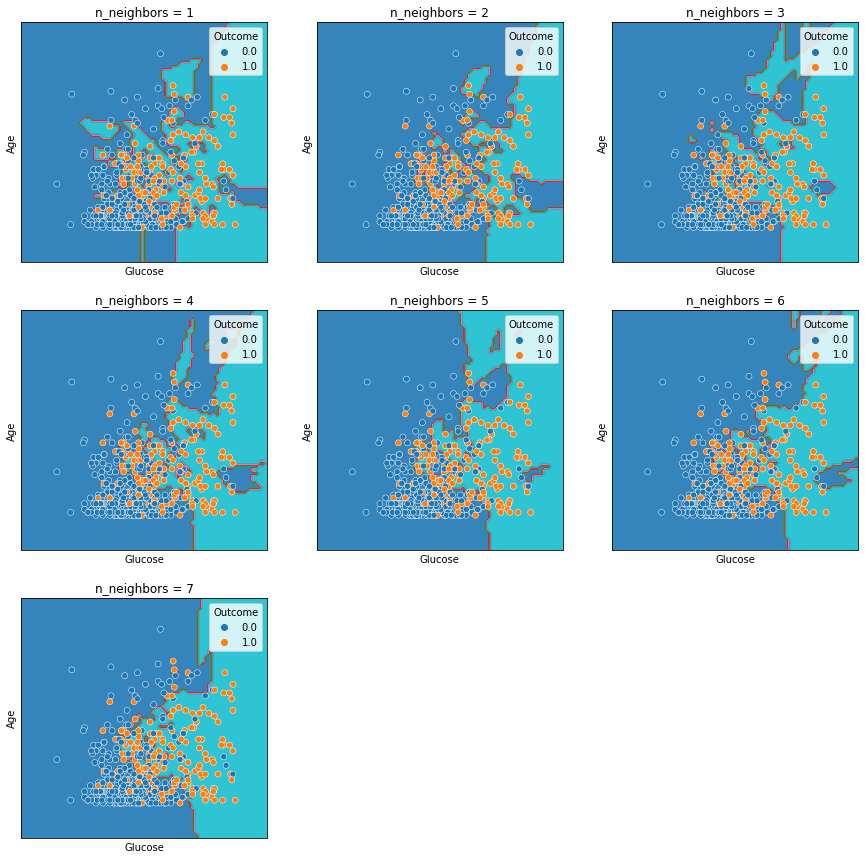

In [224]:
k = [1,2,3,4,5,6,7]
X = X_train[['Glucose', 'Age']].values
y = y_train

plt.figure(figsize=(15,15))
for i,k in enumerate(k):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)

    plt.subplot(3, 3, i + 1)
    Plot_decision_surface(X, y,
                    model = clf,
                    title = f'n_neighbors = {k}' ,
                    xlabel = 'Glucose',
                    ylabel='Age',
                    mar=0.2,
                    create_figure=False, figsize=(5,5),
                    step=0.02, alpha=0.9, set_ticks = False,
                    cmap=plt.cm.tab10)

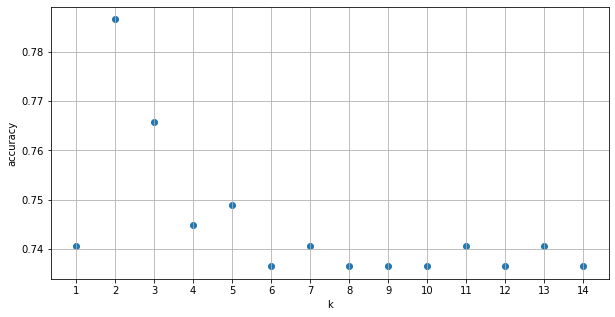

In [225]:
# How sensitive is k-NN classification accuracy to the choice of the 'p' parameter distance type
# “minkowski” MinkowskiDistance sum(|x - y|^p)^(1/p)

p_range = range(1, 15)
scores = []

for p in p_range:
    knn = KNeighborsClassifier(n_neighbors = 4, p=p)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.scatter(p_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(p_range)
plt.grid()
plt.show()

In [226]:
# Euclidean Distance is the best

# final model

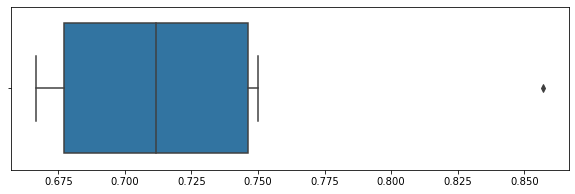

In [227]:
# Final model
KNN_model = KNeighborsClassifier(n_neighbors = 4, p=2)

# create cross val
cross_KNN = cross_val_score(KNN_model, X_train, y_train, cv=10)

plt.subplots(figsize=(10,3))
sns.boxplot(cross_KNN)
plt.show()

In [228]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [229]:
 # Predictions
y_train_pred = KNN_model.predict(X_train)
y_test_pred = KNN_model.predict(X_test)
y_pred_proba = KNN_model.predict_proba(X_test)[:, 1]

# measure the Accuracy
Training_Score = KNN_model.score(X_train, y_train)
Test_Score = KNN_model.score(X_test, y_test)

# measure f1_score
Training_f1_Score = f1_score(y_train, y_train_pred)
Test_f1_Score = f1_score(y_test, y_test_pred)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)

# print the Accuracy and f1_score
print('{0:25} : {1:5}'.format('Accuracy Training Score',  Training_Score) )
print('{0:25} : {1:5}'.format('Accuracy Test Score',  Test_Score) )
print('{0:25} : {1:5}'.format('F1 Training Score',  Training_f1_Score ) )
print('{0:25} : {1:5}'.format('F1 Test Score',  Test_f1_Score) )
print('{0:25} : {1:5}'.format('Auc',  auc) )

Accuracy Training Score   : 0.822680412371134
Accuracy Test Score       : 0.7866108786610879
F1 Training Score         : 0.6906474820143884
F1 Test Score             : 0.6222222222222222
Auc                       : 0.7750504893583967


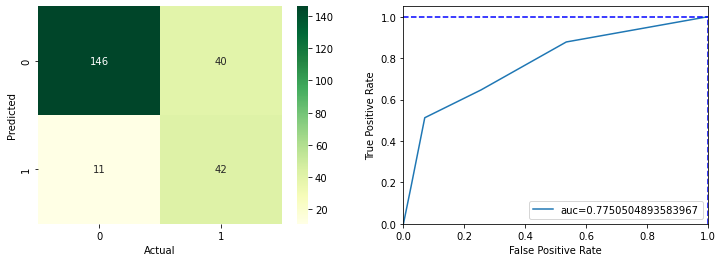

In [230]:
# Confusion matrix and Receiver Operating Characteristic(ROC) CURVE
plt.figure(figsize=(12,4))
# Confusion matrix
plt.subplot(1,2,1)
cm = np.array(confusion_matrix(y_test, y_test_pred)).T
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g',)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# ROC
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.show()

In [231]:
y_test_predicted = KNN_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[146  11]
 [ 40  42]]


In [232]:
y_test_predicted

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [233]:
report = classification_report(y_test, y_test_predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       157
         1.0       0.79      0.51      0.62        82

    accuracy                           0.79       239
   macro avg       0.79      0.72      0.74       239
weighted avg       0.79      0.79      0.77       239



## 4-  Build your own  KNN algorithm Compare your results with results obtained from step 3

In [234]:
class KNNClassifier:
    def __init__(self, p=2, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.p = p
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Get the most similar neighbors
    def get_neighbors(self, test_row):
        distances = np.power(np.power(test_row - self.X_train, self.p).sum(axis=1), 1/self.p)
        dist_and_y = np.concatenate((distances.reshape(-1,1), self.y_train.reshape(-1,1)), axis=1)
        dist_and_y = dist_and_y[dist_and_y[:, 0].argsort()]
        neighbors = dist_and_y[:, 1][:self.n_neighbors]
        return neighbors

    # Make a classification prediction with neighbors
    def predict(self, X_test):
        predictions = np.empty(X_test.shape[0])
        for i, test_row in enumerate(X_test):
            neighbors = self.get_neighbors(test_row)
            unique, counts = np.unique(neighbors, return_counts=True)
            prediction = unique[np.argmax(counts)]
            predictions[i] =prediction
        return np.array(predictions)



In [235]:
my_knn = KNNClassifier(p=2, n_neighbors=4)

my_knn.fit(X_train.values, y_train.values)

In [236]:
y_pred = my_knn.predict(X_test.values)
y_pred

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [237]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[146  11]
 [ 40  42]]


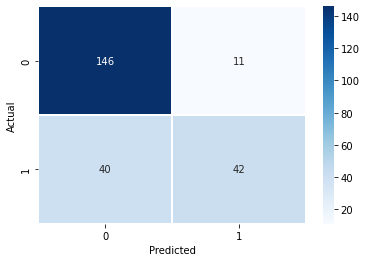

In [238]:
sns.heatmap(cm, annot=True, linewidths=0.1, cmap='Blues',fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [239]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       157
         1.0       0.79      0.51      0.62        82

    accuracy                           0.79       239
   macro avg       0.79      0.72      0.74       239
weighted avg       0.79      0.79      0.77       239



## My model results is typical of sklearn model

# try to resample the data and make it balanced

In [240]:
# over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [241]:
KNN_model = KNeighborsClassifier(n_neighbors = 4, p=2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [242]:
 # Predictions
y_train_pred = KNN_model.predict(X_train)
y_test_pred = KNN_model.predict(X_test)
y_pred_proba = KNN_model.predict_proba(X_test)[:, 1]

# measure the Accuracy
Training_Score = KNN_model.score(X_train, y_train)
Test_Score = KNN_model.score(X_test, y_test)

# measure f1_score
Training_f1_Score = f1_score(y_train, y_train_pred)
Test_f1_Score = f1_score(y_test, y_test_pred)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)

# print the Accuracy and f1_score
print('{0:25} : {1:5}'.format('Accuracy Training Score',  Training_Score) )
print('{0:25} : {1:5}'.format('Accuracy Test Score',  Test_Score) )
print('{0:25} : {1:5}'.format('F1 Training Score',  Training_f1_Score ) )
print('{0:25} : {1:5}'.format('F1 Test Score',  Test_f1_Score) )
print('{0:25} : {1:5}'.format('Auc',  auc) )

Accuracy Training Score   : 0.8867924528301887
Accuracy Test Score       : 0.7154811715481172
F1 Training Score         : 0.8881987577639752
F1 Test Score             : 0.5802469135802469
Auc                       : 0.7499223240640049


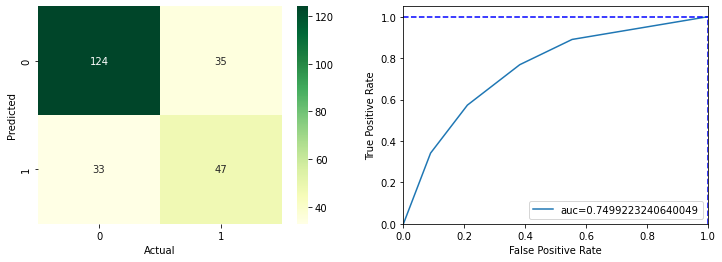

In [243]:
# Confusion matrix and Receiver Operating Characteristic(ROC) CURVE
plt.figure(figsize=(12,4))
# Confusion matrix
plt.subplot(1,2,1)
cm = np.array(confusion_matrix(y_test, y_test_pred)).T
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g',)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# ROC
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.show()

In [244]:
### accuracy increased but auc and F1 score decreased